In [1]:
# Import libraries
%load_ext autoreload
%autoreload 2

import sys
import os

# Get the parent directory (project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now you can import from config
from config import config

# Use functions inside config.py like:
# config.your_function()

In [2]:
config.AZURE_OPENAI

{'endpoint': 'https://your-endpoint.openai.azure.com/',
 'api_key': 'your-azure-openai-api-key',
 'deployment_name': 'your-gpt-deployment'}

In [3]:
from clients.azure_openai_client import *

# Initialize the mock client
# mock_client = MockAzureClient()
azure_client = get_azure_client(use_mock=True)

# Call get_response without specifying model_name
response1 = azure_client.get_response(prompt="Explain the risk score.")
print("Response 1:\n", response1)

# Call get_response with a model_name containing "judge"
response2 = azure_client.get_response(
    prompt="Evaluate explanation clarity.",
    model_name="RiskJudgeModel-v1"
)
print("\nResponse 2:\n", response2)

🧪 Mock Azure Client initialized. No actual API calls will be made.
Response 1:
 This entity has a high risk score of 85% primarily due to three factors: a high number of inbound wires, significant exposure to high-risk countries, and a central position in transaction networks. Each of these increases the risk profile significantly.

Response 2:
 Clarity: 5/5
Conciseness: 2/5
Completeness: 2/5
Complete evaluation provided.


In [4]:
from workflows import generate_data as gd

In [5]:
# Example usages:
print(gd.generate_mock_judges(10))  # 5 default-style judges
print(gd.generate_mock_judges(3, "Analyst", "analyst_model_", 100))  # Custom naming

{'MockJudge1': 'mock_judge_model1', 'MockJudge2': 'mock_judge_model2', 'MockJudge3': 'mock_judge_model3', 'MockJudge4': 'mock_judge_model4', 'MockJudge5': 'mock_judge_model5', 'MockJudge6': 'mock_judge_model6', 'MockJudge7': 'mock_judge_model7', 'MockJudge8': 'mock_judge_model8', 'MockJudge9': 'mock_judge_model9', 'MockJudge10': 'mock_judge_model10'}
{'Analyst100': 'analyst_model_100', 'Analyst101': 'analyst_model_101', 'Analyst102': 'analyst_model_102'}


In [6]:
feature_lib = gd.create_realistic_aml_feature_library()

input_data_path = "../data/input/structured_aml_dataset.json"
df_structured = gd.generate_structured_shap_dataset(feature_lib, n_entities=100, output_path=input_data_path)

✅ Structured dataset saved to ../data/input/structured_aml_dataset.json


In [7]:
feature_lib

,feature_name,description
0,wirein_ct,Number of wire inbound transactions
1,wireout_ct,Number of wire outbound transactions
2,wirein_amt,Total inbound wire amount
3,wireout_amt,Total outbound wire amount
4,avg_txn_amt,Average transaction amount
5,high_risk_country_txn_pct,Percentage of transactions with high-risk coun...
6,acct_age_days,Account age in days
7,num_sar_reports,Number of SAR reports filed
8,login_freq_30d,Login frequency in the past 30 days
9,geo_diversity_score,Number of unique countries accessed from


In [8]:
df_structured

,entity_id,risk_score,features
0,1,0.152426,"{'wirein_ct': {'feature_value': 8, 'shap_value..."
1,2,0.038368,"{'wirein_ct': {'feature_value': 13, 'shap_valu..."
2,3,0.321647,"{'wirein_ct': {'feature_value': 7, 'shap_value..."
3,4,0.466511,"{'wirein_ct': {'feature_value': 11, 'shap_valu..."
4,5,0.252263,"{'wirein_ct': {'feature_value': 7, 'shap_value..."
...,...,...,...
95,96,0.080513,"{'wirein_ct': {'feature_value': 11, 'shap_valu..."
96,97,0.222963,"{'wirein_ct': {'feature_value': 11, 'shap_valu..."
97,98,0.058121,"{'wirein_ct': {'feature_value': 5, 'shap_value..."
98,99,0.071312,"{'wirein_ct': {'feature_value': 9, 'shap_value..."


In [9]:
df_structured.iloc[0].features

{'wirein_ct': {'feature_value': 8,
  'shap_value': -0.01014626037702704,
  'abs_shap_value': 0.01014626037702704,
  'contribution_pct': 9.231564693664323},
 'wireout_ct': {'feature_value': 11,
  'shap_value': -0.016068855476362314,
  'abs_shap_value': 0.016068855476362314,
  'contribution_pct': 14.620231826402852},
 'wirein_amt': {'feature_value': 58824.98,
  'shap_value': -0.006523960600469522,
  'abs_shap_value': 0.006523960600469522,
  'contribution_pct': 5.93581892285308},
 'wireout_amt': {'feature_value': 12146.1,
  'shap_value': -0.0010549142247970981,
  'abs_shap_value': 0.0010549142247970981,
  'contribution_pct': 0.9598126354544277},
 'avg_txn_amt': {'feature_value': 76829.19,
  'shap_value': -0.006276378810027252,
  'abs_shap_value': 0.006276378810027252,
  'contribution_pct': 5.710556882405548},
 'high_risk_country_txn_pct': {'feature_value': 9,
  'shap_value': -0.020348798368462595,
  'abs_shap_value': 0.020348798368462595,
  'contribution_pct': 18.51433351761034},
 'acct_a

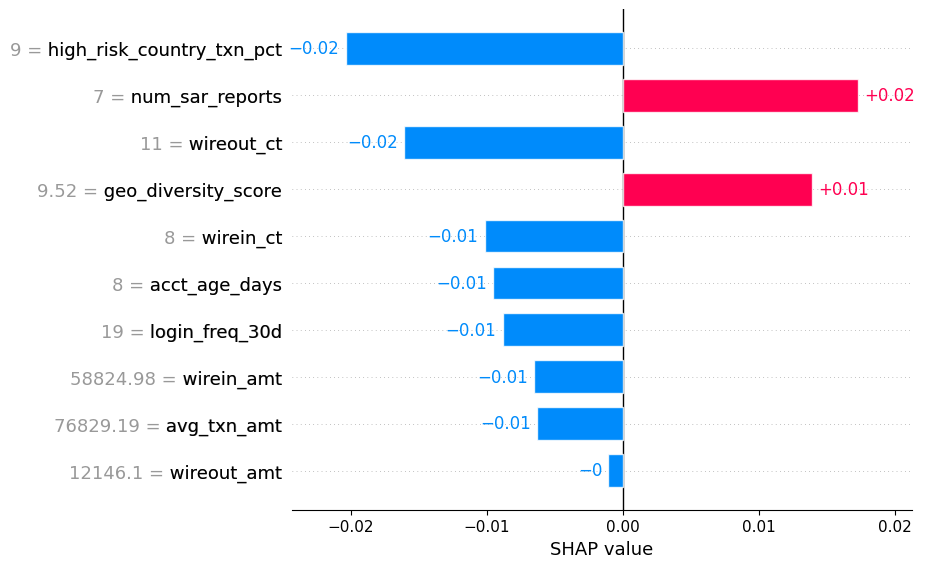

In [10]:
import shap

# Example: Plot for entity_id = 1

explanation = gd.load_shap_explanation(input_data_path, entity_id=1)
shap.plots.bar(explanation)

In [11]:
import json
import prompts.prompt_generator as pg

top_n = 5

seg = ["wirein_ct", "wireout_ct", "wirein_amt", "wireout_amt", "avg_txn_amt"]

with open(input_data_path, "r") as f:
    entity_data = json.loads(f.readline())  # Get first entity

feature_library_df = gd.create_realistic_aml_feature_library()
prompt = pg.build_feature_contribution_prompt_from_structured_json(entity_data, feature_library_df, top_n=top_n, selected_features=seg)
print(prompt)

You are a risk model explanation assistant. Given a risk score and a list of features with their descriptions and contributions, generate a clear, concise narrative explaining the risk score for entity ID 1.

Entity ID: 1
Risk Score: 15%
Top Features and Contributions:
- wireout_ct (Number of wire outbound transactions): 14.6% contribution
- wirein_ct (Number of wire inbound transactions): 9.2% contribution
- wirein_amt (Total inbound wire amount): 5.9% contribution
- avg_txn_amt (Average transaction amount): 5.7% contribution
- wireout_amt (Total outbound wire amount): 1.0% contribution

Please produce a narrative that:
- Starts with the risk score
- Explains each feature’s contribution in plain language
- Highlights why each feature might indicate a higher risk



In [12]:
# Load structured dataset
with open(input_data_path, "r") as f:
    entity_data_list = [json.loads(line) for line in f]

In [ ]:
entity_data_list[0]

In [15]:
# Add prompt column
# df_with_prompts = gd.add_prompt_column(entity_data_list, feature_library_df, top_n=5)
df_with_prompts = gd.add_prompt_to_entity_json(entity_data_list, feature_library_df, top_n=top_n, selected_features=seg)
output_data_path = "../data/output/entities_with_prompts.json"
gd.save_entities_to_json(df_with_prompts, output_data_path)

✅ Entities saved to ../data/output/entities_with_prompts.json


In [ ]:
# Assume seg1, seg2, seg3, seg4 are predefined lists of features
segments = [seg1, seg2, seg3, seg4]

# Split the data into chunks of 25 and apply the corresponding segment
chunk_size = 25
df_with_prompts = []

for i, seg in enumerate(segments):
    start = i * chunk_size
    end = start + chunk_size
    chunk = entity_data_list[start:end]

    updated_chunk = gd.add_prompt_to_entity_json(
        chunk,
        feature_library_df,
        top_n=top_n,
        selected_features=seg
    )
    df_with_prompts.extend(updated_chunk)

In [ ]:
df_with_prompts[0]

In [16]:
# Load structured dataset
with open(output_data_path, "r") as f:
    entity_data_list = json.load(f)

In [ ]:
entity_data_list[0]

In [17]:
# output_data_path = "../data/output/entities_with_prompts.json"

updated_entities = gd.enrich_entities_with_llm_explanations(
    input_json_path="../data/output/entities_with_prompts.json",
    output_json_path="../data/output/entities_with_llm_explanations.json",
    feature_library_df=feature_library_df,
    azure_client=azure_client,
    top_n=top_n,
    log_every_n=25# New parameter for logging frequency
)

Processed entity 25/100
Processed entity 50/100
Processed entity 75/100
Processed entity 100/100
✅ Saved enriched entities with explanations to ../data/output/entities_with_llm_explanations.json


In [18]:
with open("../data/output/entities_with_llm_explanations.json", "r") as f:
    output = json.load(f)

In [ ]:
output[0]

In [19]:
from evaluation import judge

enriched_entities = gd.enrich_and_evaluate_entities(
    input_json_path="../data/output/entities_with_llm_explanations.json",
    output_json_path="../data/output/entities_enriched_evaluated.json",
    feature_library_df=feature_library_df,
    azure_client=azure_client,
    judge_models=judge.MOCK_JUDGE_MODELS,
    top_n=top_n,
    log_every_n=25  # print progress every 3 entities
)

✅ Processed 25/100 entities
✅ Processed 50/100 entities
✅ Processed 75/100 entities
✅ Processed 100/100 entities
✅ Evaluations completed and saved to ../data/output/entities_enriched_evaluated.json


In [20]:
with open("../data/output/entities_enriched_evaluated.json", "r") as f:
    output = json.load(f)

In [ ]:
output[0]

In [21]:
entity_data_list = gd.update_mean_std_scores_in_json(
    input_json_path="../data/output/entities_enriched_evaluated.json",
    output_json_path="../data/output/entities_with_stats.json"
)

✅ Per-entity stats saved to: ../data/output/entities_with_stats.json


In [22]:
import json

with open("../data/output/entities_with_stats.json", "r") as f:
    output = json.load(f)

In [23]:
len(output), output[0]

(100,
 {'entity_id': 1,
  'risk_score': 0.1524262447,
  'features': {'wirein_ct': {'feature_value': 8,
    'shap_value': -0.0101462604,
    'abs_shap_value': 0.0101462604,
    'contribution_pct': 9.2315646937},
   'wireout_ct': {'feature_value': 11,
    'shap_value': -0.0160688555,
    'abs_shap_value': 0.0160688555,
    'contribution_pct': 14.6202318264},
   'wirein_amt': {'feature_value': 58824.98,
    'shap_value': -0.0065239606,
    'abs_shap_value': 0.0065239606,
    'contribution_pct': 5.9358189229},
   'wireout_amt': {'feature_value': 12146.1,
    'shap_value': -0.0010549142,
    'abs_shap_value': 0.0010549142,
    'contribution_pct': 0.9598126355},
   'avg_txn_amt': {'feature_value': 76829.19,
    'shap_value': -0.0062763788,
    'abs_shap_value': 0.0062763788,
    'contribution_pct': 5.7105568824},
   'high_risk_country_txn_pct': {'feature_value': 9,
    'shap_value': -0.0203487984,
    'abs_shap_value': 0.0203487984,
    'contribution_pct': 18.5143335176},
   'acct_age_days':

In [16]:
final = dict()
final['model_1'] = output

In [18]:
len(final)

1

In [ ]:
gd.show_dict_structure(output[0])

In [ ]:
gd.display_dict_structure(output[0])

In [22]:
output[:2]

[{'entity_id': 1,
  'risk_score': 0.1619562931,
  'features': {'wirein_ct': {'feature_value': 6,
    'shap_value': 7.3414e-05,
    'abs_shap_value': 7.3414e-05,
    'contribution_pct': 0.0815613071},
   'wireout_ct': {'feature_value': 11,
    'shap_value': -0.0048721254,
    'abs_shap_value': 0.0048721254,
    'contribution_pct': 5.4128189042},
   'wirein_amt': {'feature_value': 88538.74,
    'shap_value': -0.0116801552,
    'abs_shap_value': 0.0116801552,
    'contribution_pct': 12.9763830934},
   'wireout_amt': {'feature_value': 5846.77,
    'shap_value': -0.0136718824,
    'abs_shap_value': 0.0136718824,
    'contribution_pct': 15.1891460679},
   'avg_txn_amt': {'feature_value': 60727.7,
    'shap_value': 0.0075275062,
    'abs_shap_value': 0.0075275062,
    'contribution_pct': 8.3628857671},
   'high_risk_country_txn_pct': {'feature_value': 8,
    'shap_value': 0.0144906543,
    'abs_shap_value': 0.0144906543,
    'contribution_pct': 16.0987826981},
   'acct_age_days': {'feature_va

Figure saved to: ../data/output/evaluation_scores.png


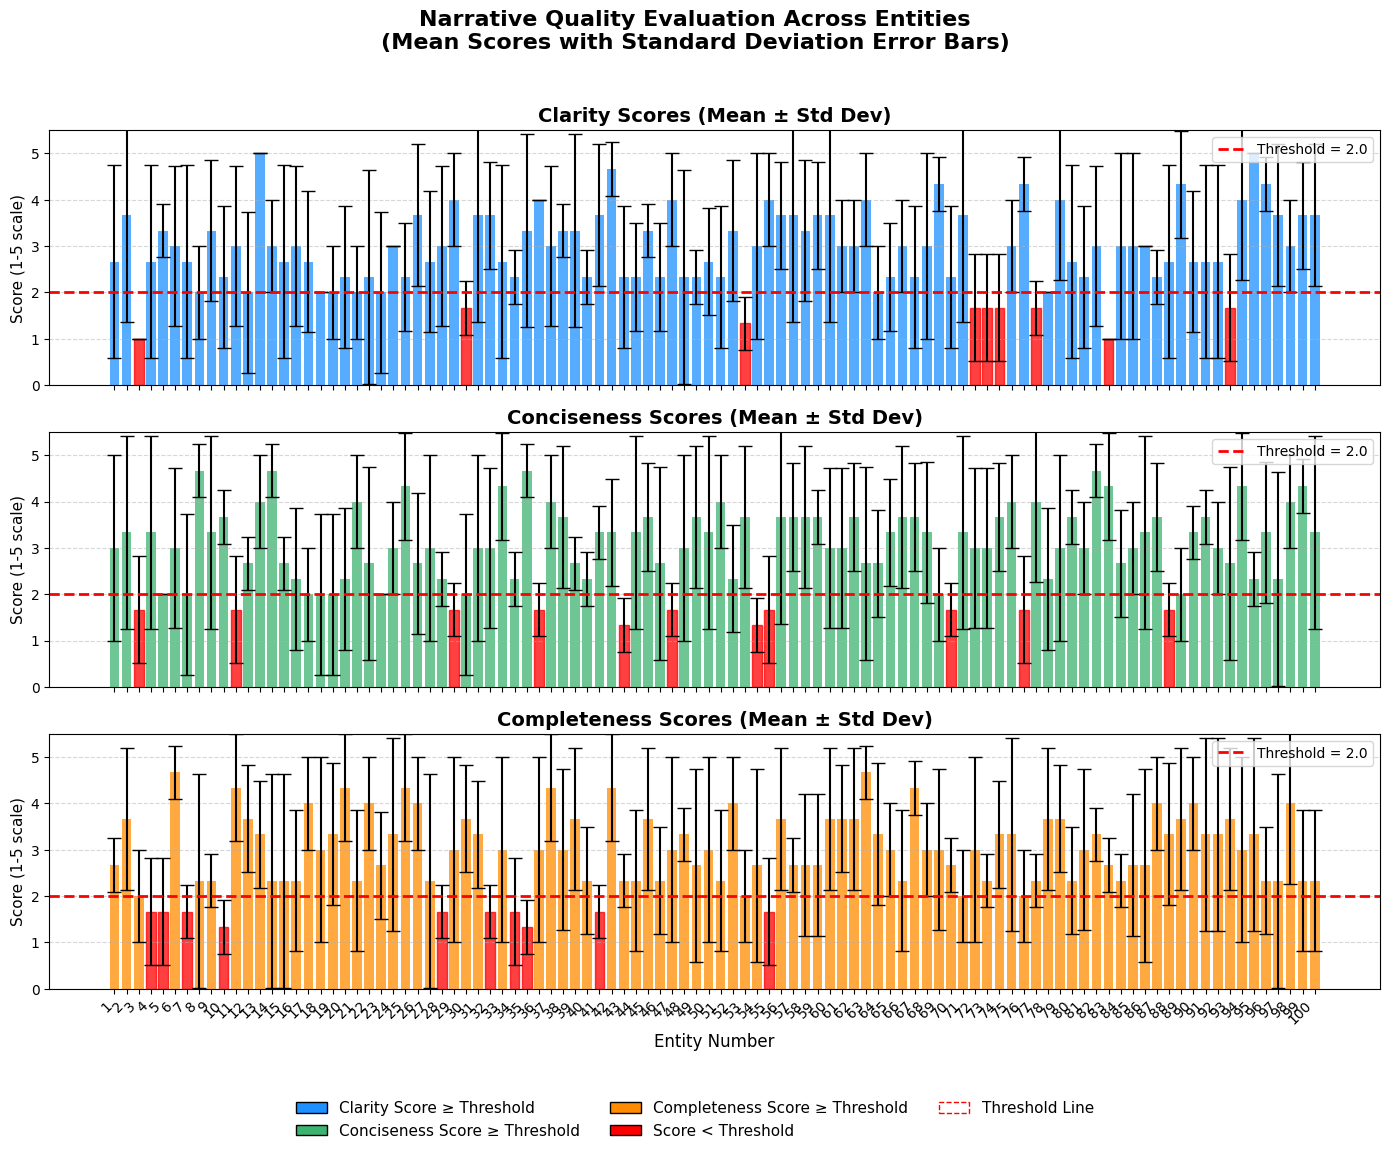

In [24]:
threshold = 2.0

gd.plot_entity_quality_stats_business(output, threshold=threshold, save_path="../data/output/evaluation_scores.png")

In [25]:
# Example usage:
below_thresh_ids = gd.get_entities_below_threshold(output, threshold=threshold)
print("Entities below threshold:", below_thresh_ids)

Entities below threshold: [3, 4, 5, 7, 10, 11, 28, 29, 30, 32, 34, 35, 36, 41, 43, 47, 53, 54, 55, 70, 72, 73, 74, 76, 77, 83, 88, 93]


In [26]:
len(below_thresh_ids)

28

Figure saved to: ../data/output/evaluation_scores_2.png


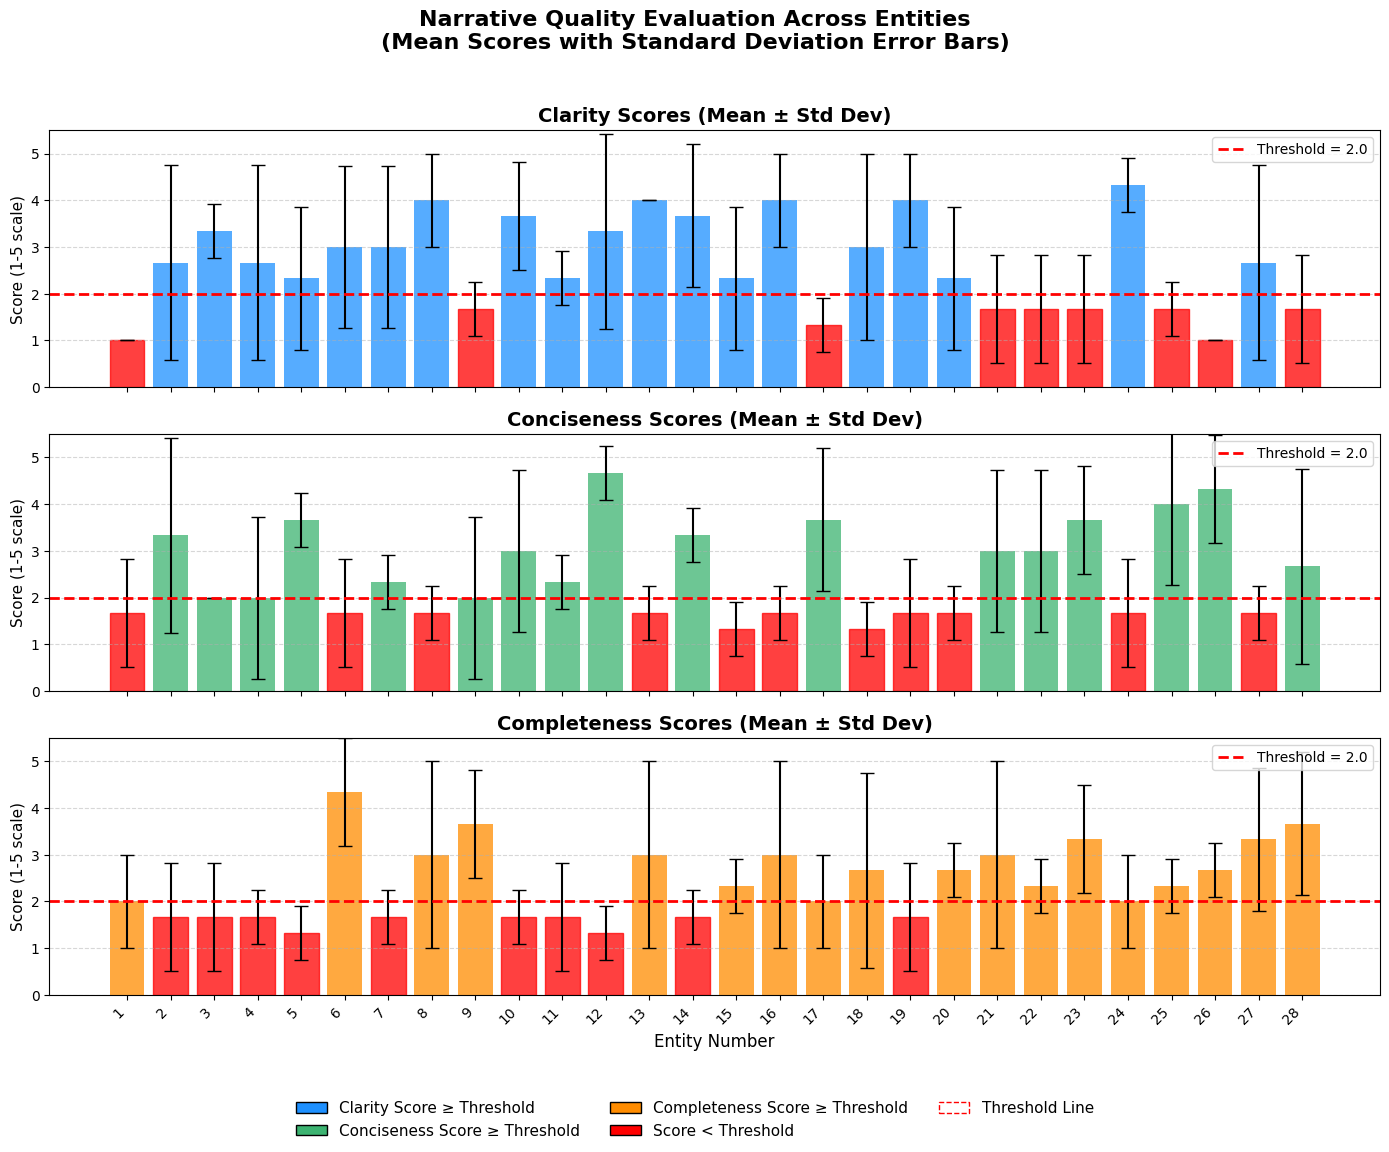

In [27]:
# Sample list of entity IDs to keep
target_ids = below_thresh_ids  # replace with your actual list

# Filtered data
filtered_data = [entity for entity in output if entity['entity_id'] in target_ids]

gd.plot_entity_quality_stats_business(filtered_data, threshold=threshold, save_path="../data/output/evaluation_scores_2.png")

In [31]:
print(target_ids)

[3, 4, 5, 7, 10, 11, 28, 29, 30, 32, 34, 35, 36, 41, 43, 47, 53, 54, 55, 70, 72, 73, 74, 76, 77, 83, 88, 93]


In [29]:
# entity IDs you want to plot
selected_ids = [7]

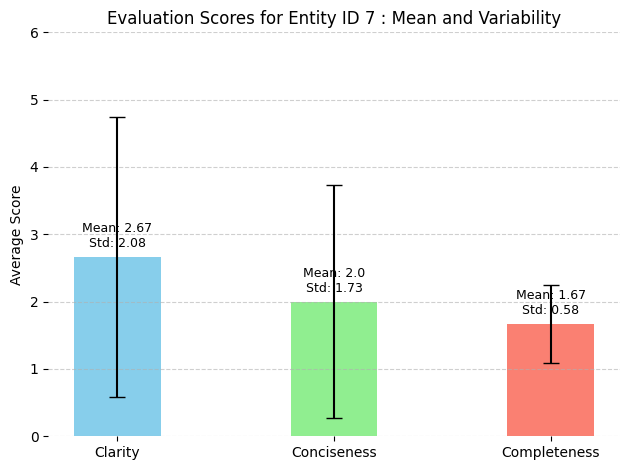

In [30]:
# call the function
gd.plot_evaluation_stats(filtered_data, selected_ids)

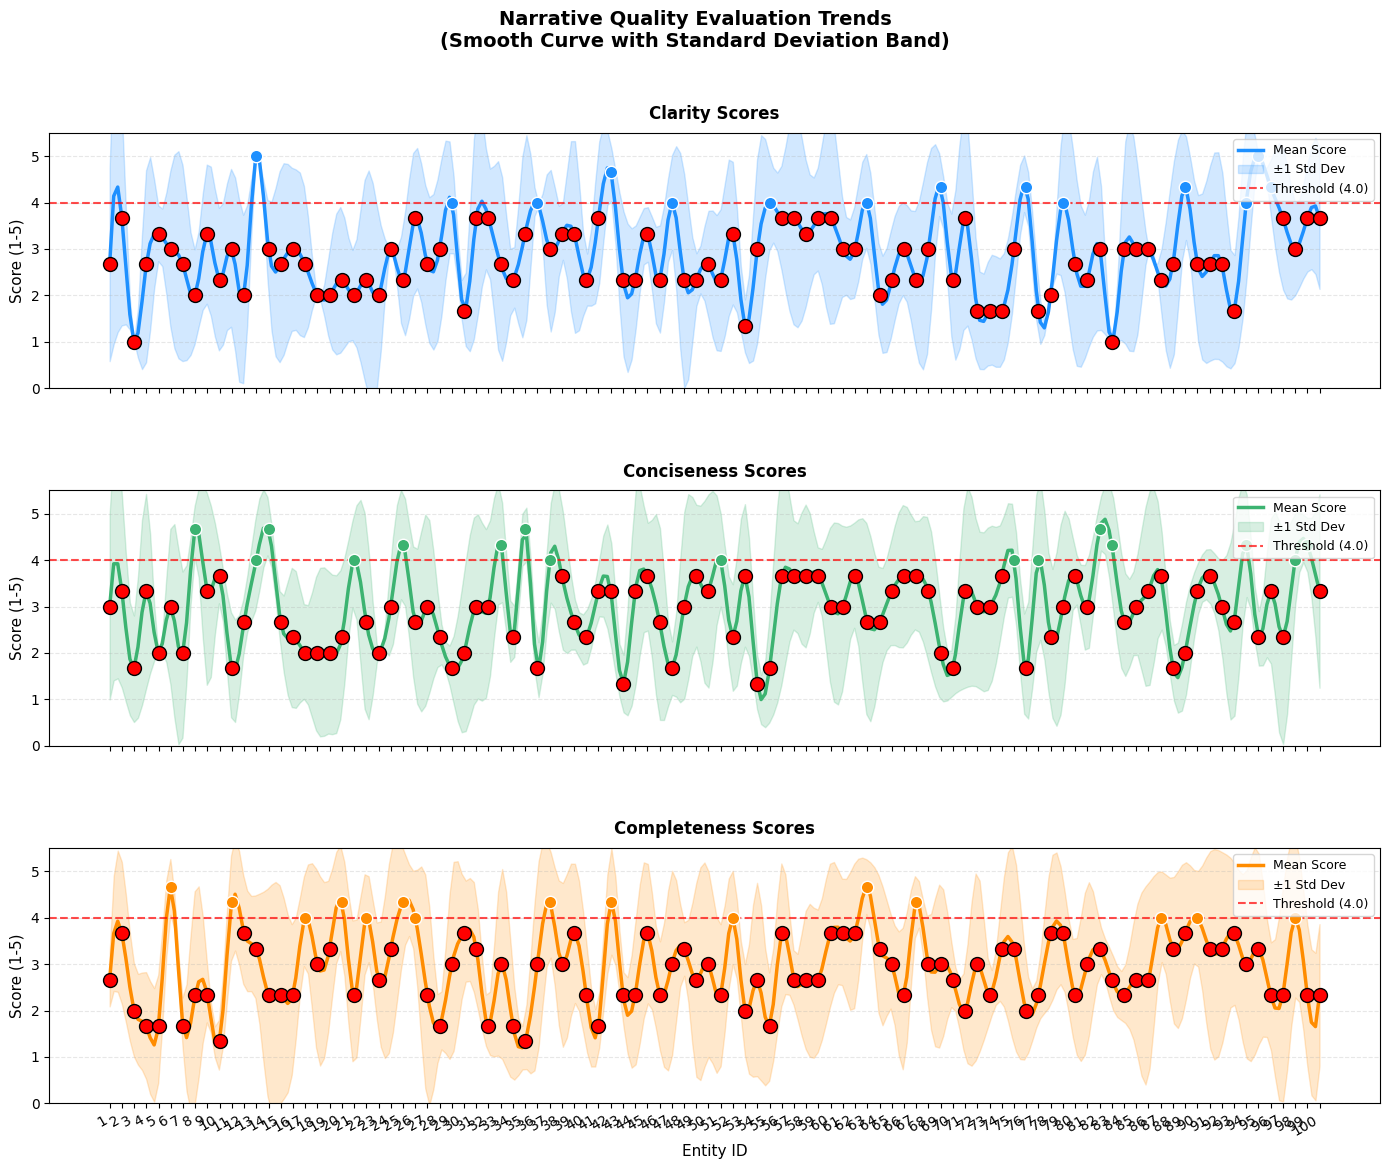

In [40]:
gd.plot_entity_quality_stats_business_curve(output, threshold=4.0, save_path=None)

In [7]:
import json

with open("../data/input/generating_model_entity_data.json", "r") as f:
    test = json.load(f)

In [8]:
test

{'GPT-4o-finetuned-risk-explainer': [{'entity_id': 1,
   'risk_score': 0.1406709239,
   'features': {'wirein_ct': {'feature_value': 28257.46,
     'shap_value': -0.0182214,
     'abs_shap_value': 0.0182214,
     'contribution_pct': 3.87388319766146},
    'wireout_ct': {'feature_value': 76870.24,
     'shap_value': -0.04785222,
     'abs_shap_value': 0.04785222,
     'contribution_pct': 10.173417576519899},
    'wirein_amt': {'feature_value': 53213.95,
     'shap_value': 0.0033745,
     'abs_shap_value': 0.0033745,
     'contribution_pct': 0.7174212108020568},
    'wireout_amt': {'feature_value': 22172.48,
     'shap_value': 0.04923017,
     'abs_shap_value': 0.04923017,
     'contribution_pct': 10.466370771785773},
    'avg_txn_amt': {'feature_value': 47840.56,
     'shap_value': 0.03393615,
     'abs_shap_value': 0.03393615,
     'contribution_pct': 7.214850740246027},
    'high_risk_country_txn_pct': {'feature_value': 9257.33,
     'shap_value': -0.09210254,
     'abs_shap_value': 0.

In [20]:
import json

with open("../data/output/final.json", "r") as f:
    test = json.load(f)

In [21]:
len(test)

5

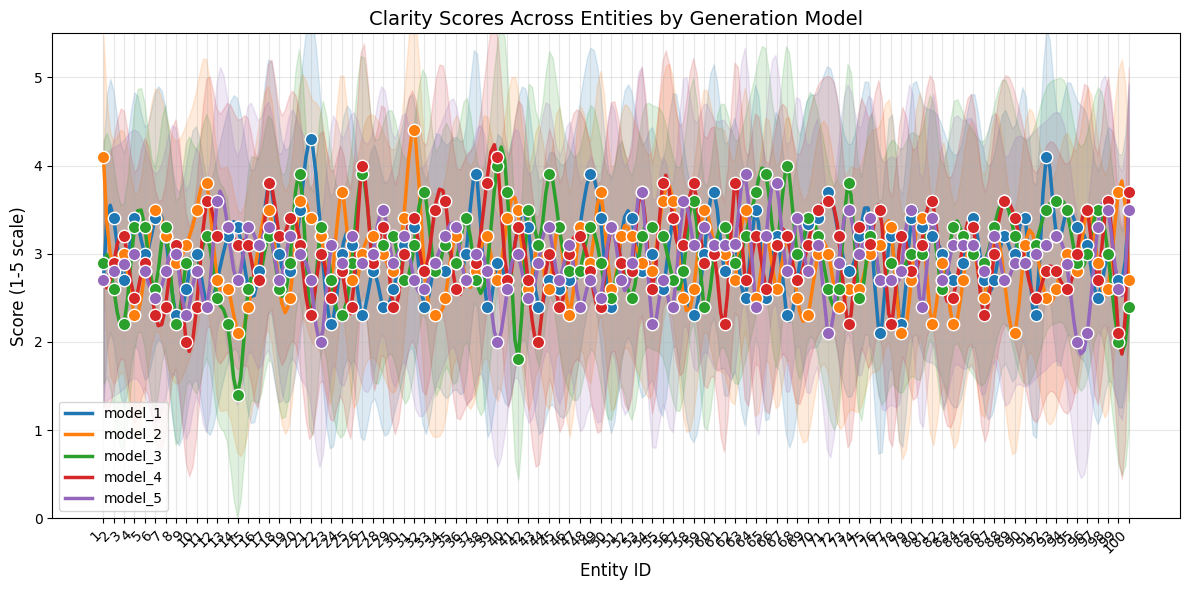

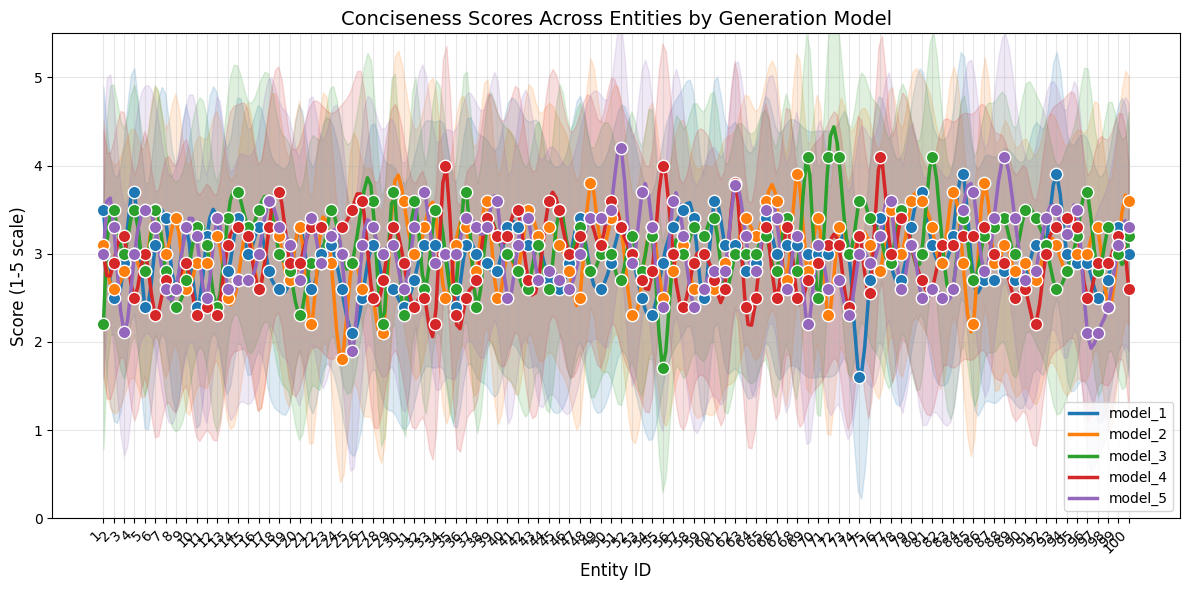

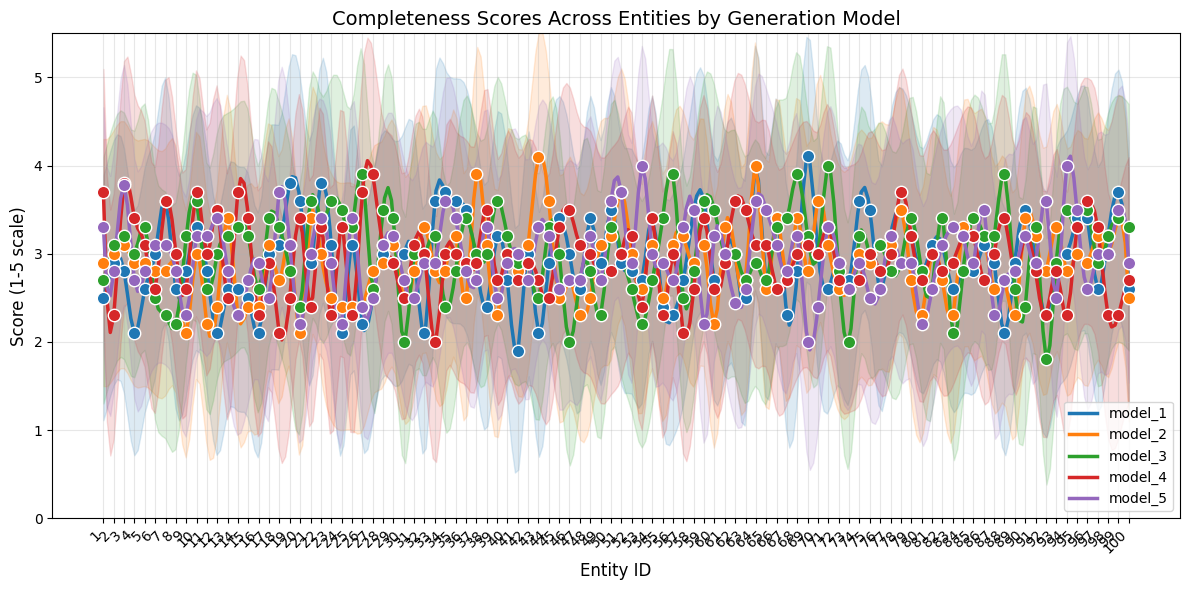

In [22]:
# Example usage with your data:
gd.plot_model_metric_trends(test, save_prefix="model_comparison")

In [45]:
test

{'GPT-4o-finetuned-risk-explainer': [{'entity_id': 1,
   'risk_score': 0.1406709239,
   'features': {'wirein_ct': {'feature_value': 28257.46,
     'shap_value': -0.0182214,
     'abs_shap_value': 0.0182214,
     'contribution_pct': 3.87388319766146},
    'wireout_ct': {'feature_value': 76870.24,
     'shap_value': -0.04785222,
     'abs_shap_value': 0.04785222,
     'contribution_pct': 10.173417576519899},
    'wirein_amt': {'feature_value': 53213.95,
     'shap_value': 0.0033745,
     'abs_shap_value': 0.0033745,
     'contribution_pct': 0.7174212108020568},
    'wireout_amt': {'feature_value': 22172.48,
     'shap_value': 0.04923017,
     'abs_shap_value': 0.04923017,
     'contribution_pct': 10.466370771785773},
    'avg_txn_amt': {'feature_value': 47840.56,
     'shap_value': 0.03393615,
     'abs_shap_value': 0.03393615,
     'contribution_pct': 7.214850740246027},
    'high_risk_country_txn_pct': {'feature_value': 9257.33,
     'shap_value': -0.09210254,
     'abs_shap_value': 0.

In [49]:
len(test)

3

In [54]:
for k, v in test.items():
    print(k)

GPT-4o-finetuned-risk-explainer
Claude-3-sonnet-v1
Gemini-1.5-pro


In [55]:
test["GPT-4o-finetuned-risk-explainer"]

[{'entity_id': 1,
  'risk_score': 0.1406709239,
  'features': {'wirein_ct': {'feature_value': 28257.46,
    'shap_value': -0.0182214,
    'abs_shap_value': 0.0182214,
    'contribution_pct': 3.87388319766146},
   'wireout_ct': {'feature_value': 76870.24,
    'shap_value': -0.04785222,
    'abs_shap_value': 0.04785222,
    'contribution_pct': 10.173417576519899},
   'wirein_amt': {'feature_value': 53213.95,
    'shap_value': 0.0033745,
    'abs_shap_value': 0.0033745,
    'contribution_pct': 0.7174212108020568},
   'wireout_amt': {'feature_value': 22172.48,
    'shap_value': 0.04923017,
    'abs_shap_value': 0.04923017,
    'contribution_pct': 10.466370771785773},
   'avg_txn_amt': {'feature_value': 47840.56,
    'shap_value': 0.03393615,
    'abs_shap_value': 0.03393615,
    'contribution_pct': 7.214850740246027},
   'high_risk_country_txn_pct': {'feature_value': 9257.33,
    'shap_value': -0.09210254,
    'abs_shap_value': 0.09210254,
    'contribution_pct': 19.581068533040412},
   'a

In [23]:
# m = ["GPT-4o-finetuned-risk-explainer"]
m = ["model_1"]

filtered = {k: v for k, v in test.items() if k in m}  # {'c': 3, 'd': 4}

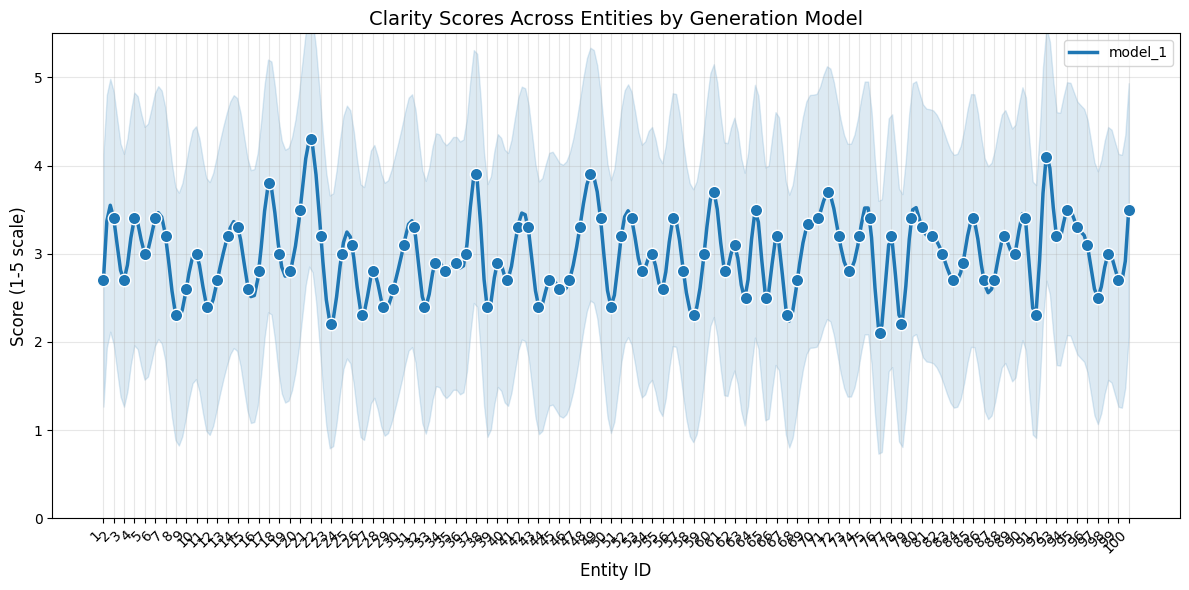

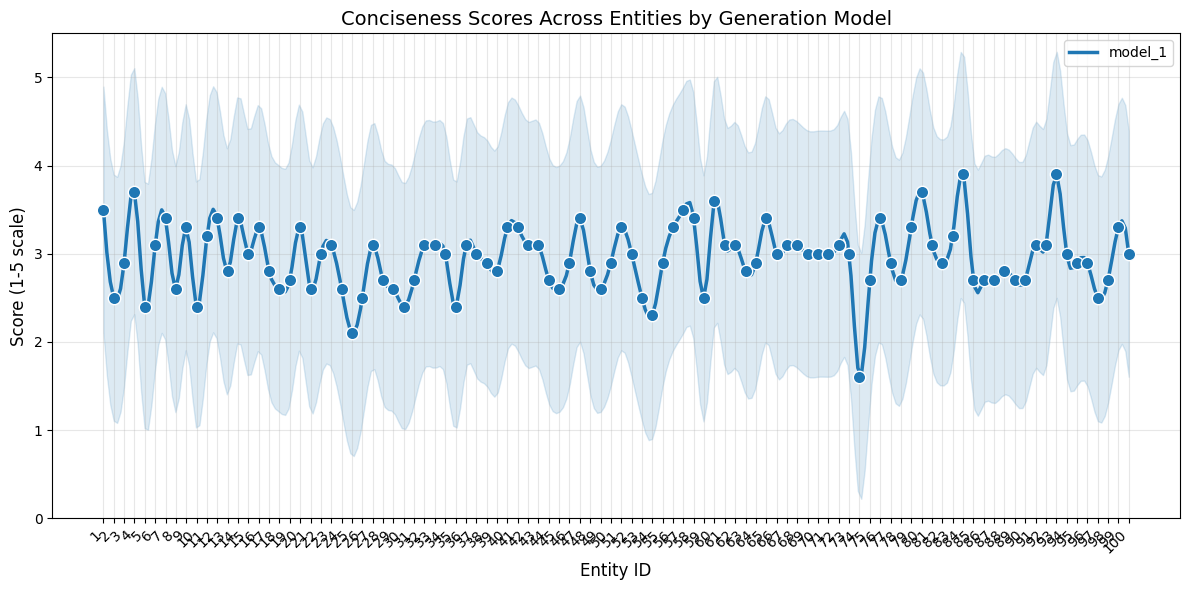

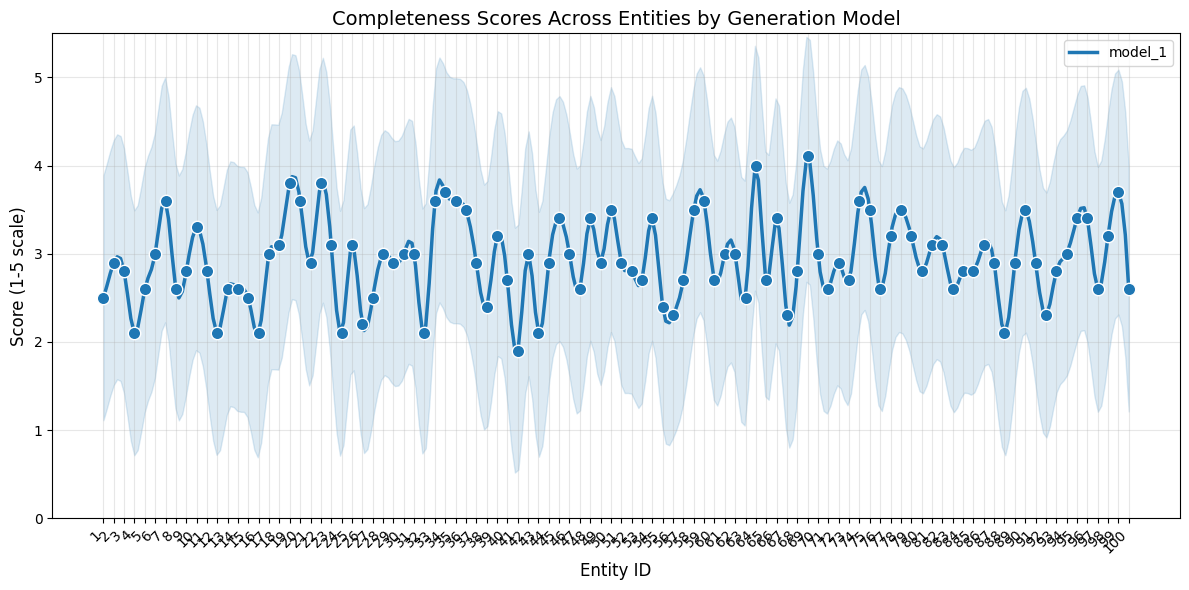

In [24]:
gd.plot_model_metric_trends(filtered, save_prefix="model_comparison")